In [1]:

# just to make the cells appear wider:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))



import h5py as h5
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import string


/var/folders/lc/vg4hc2nn2pn05y4lw3h5wmpm0000gn/T/ipykernel_73874/3036708214.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# 1 Download and read in the BHNS datafile:


1A. Download the BHNS file that you want from the Publicly available Zenodo: https://zenodo.org/record/5178777 
The example below shows the output for model 'A', which you can obtain by downloading the fiducial.zip file. 


all lines of code that you might have to change are given with "# change this line! " 

In [2]:
# to obtain properties of ALL binaries simulated, do this:

DCOtype = 'BHNS'   # You can change this line to 'BBH', 'BHNS' 'BNS', or 'ALL' (All DCOs)  # change this line! (but required downloading BBH/BNS data from Zenodo)


# add path to where the COMPASOutput.h5 file is stored. 
# For you the part '/Volumes/Andromeda2/DATA/AllDCO_bugfix/' is probably different
path = '/Volumes/Andromeda2/DATA/AllDCO_bugfix/fiducial/COMPASCompactOutput_'+ DCOtype +'_A.h5' # change this line! 


print('excecuting this code might take a little while (~few min) \n')
fdata = h5.File(path)
# shows the different files within the hdf5 folder 

print('the available datasets for this file are:')
print(fdata.keys())










excecuting this code might take a little while (~few min) 

the available datasets for this file are:
<KeysViewHDF5 ['RLOF', 'commonEnvelopes', 'doubleCompactObjects', 'formationChannels', 'supernovae', 'systems', 'weights_detected', 'weights_detectedPerRedshift', 'weights_intrinsic', 'weights_intrinsicPerRedshift']>


### M1, M2 and Chirpmass in Msun

The most used parameters are quoted in the file "doubleCompactObjects", that describes many properties of the binaries that form the type of double-compact object (DCO)
merger (here, BHNS) below is an example: 


In [3]:
# see several parameters that are contained in this file
print(fdata['doubleCompactObjects'].keys())

<KeysViewHDF5 ['COCoreMassDCOFormation1', 'COCoreMassDCOFormation2', 'ECSNPrimary', 'ECSNSecondary', 'HeCoreMassDCOFormation1', 'HeCoreMassDCOFormation2', 'ID', 'M1', 'M1ZAMS', 'M2', 'M2ZAMS', 'Metallicity1', 'Metallicity2', 'PISNPrimary', 'PISNSecondary', 'PPISNPrimary', 'PPISNSecondary', 'PrimaryMTCase', 'RL1to2PostCEE', 'RL1to2PreCEE', 'RL2to1PostCEE', 'RL2to1PreCEE', 'RLOFSecondaryAfterCEE', 'SecondaryMTCase', 'SemiMajorAxisPostCEE', 'SemiMajorAxisPreCEE', 'USSNPrimary', 'USSNSecondary', 'coreMassDCOFormation1', 'coreMassDCOFormation2', 'doubleCommonEnvelopeFlag', 'drawnKick1', 'drawnKick2', 'eccentricityDCOFormation', 'eccentricityInitial', 'eccentricityPrior2ndSN', 'kickDirectionPower', 'mergesInHubbleTimeFlag', 'optimisticCEFlag', 'phiSupernova1', 'phiSupernova2', 'recycledPrimary', 'recycledSecondary', 'relativeVelocity2ndSN', 'samplingPhase', 'seed', 'separationDCOFormation', 'separationInitial', 'separationPrior2ndSN', 'sigmaKickBH', 'sigmaKickNS', 'stellarType1', 'stellarTyp

In [4]:
print(fdata["commonEnvelopes"].keys())

<KeysViewHDF5 ['EccentricityPostCEE', 'EccentricityPreCEE', 'MSAccretorDuringCEEFlag', 'SemiMajorAxisPostCEE', 'SemiMajorAxisPreCEE', 'Teff1', 'Teff2', 'alphaCE', 'bEFixed1', 'bEFixed2', 'bEKruckow1', 'bEKruckow2', 'bELoveridge1', 'bELoveridge2', 'bELoveridgeWinds1', 'bELoveridgeWinds2', 'bENanjing1', 'bENanjing2', 'bindingEnergy1', 'bindingEnergy2', 'counterCEE', 'doubleCoreCommonEnvelopeFlag', 'finalStellarType1', 'finalStellarType2', 'flagRLOF1', 'flagRLOF2', 'immediateRLOFAfterCEE', 'lambda1', 'lambda2', 'lambdaFixed1', 'lambdaFixed2', 'lambdaKruckow1', 'lambdaKruckow2', 'lambdaLoveridge1', 'lambdaLoveridge2', 'lambdaLoveridgeWinds1', 'lambdaLoveridgeWinds2', 'lambdaNanjing1', 'lambdaNanjing2', 'luminosity1', 'luminosity2', 'm_EccentricityRLOF', 'mass1', 'mass1ZAMS', 'mass2', 'mass2ZAMS', 'massCore1', 'massCore2', 'massEnvelope1', 'massEnvelope2', 'massTransferTrackerHistory', 'optimisticCommonEnvelopeFlag', 'radius1', 'radius1AfterStripping', 'radius2', 'radius2AfterStripping', 'r

In [5]:
print(fdata["systems"].keys())

<KeysViewHDF5 ['ID', 'Metallicity1', 'Metallicity2', 'SEED', 'disbound', 'eccentricity', 'mass1', 'mass2', 'meanAnomaly1', 'meanAnomaly2', 'omega1', 'omega2', 'phi1', 'phi2', 'samplingPhase', 'separation', 'stellar_merger', 'theta1', 'theta2', 'weight']>


### For example, to get the compact object masses of all simulated BH-NS systems you do: 


In [6]:
fDCO      = fdata['doubleCompactObjects']
M1              = fDCO['M1'][...].squeeze()     # Compact object mass of star 1 in Msun 
print(M1)

[ 3.74552  3.93168 13.4491  ...  4.06103  4.023    3.73859]


## Weighted samples! 

The datafiles contain sevral "weights". These are probabilities assigned to each binary that translates the simulated binary into a "astrophysical" unit. In other words, it translates the occurance of BHNS in the simulation, to the rate or probability of that BHNS in a real Universe. There are three types of weights by default provided (but it will be easy to calculate this for any other scenario, say at any given redshift: 

 - 1. the metallicity-weights: fdata['doubleCompactObjects']['weight']: this are the weights / probability of that BH-NS for a fixed Universe. The units are # number per solar masses per year^-1 for a given metallicity. It reproduces Figure 1 in: https://ui.adsabs.harvard.edu/abs/2022MNRAS.516.5737B/abstract
 
 - 2. the "Astrophysical GW rate" weight:  fdata['weights_intrinsic']: this gives the rate of BH-NS mergers in Gpc^-3 yr^-1 at redshift 0 
 
 - 3. the LVK O3 rate weights: fdata['weights_detected']: this gives the rate of BH-NS mergers in number per yr^-1 for a LVK network similar to O3 sensitivity.  
 
A few examples are given below. I usually use the w_112 weights, but the different indices after 'w_' indicate different models for the Universe (how many stars form with each metallicity)



In [7]:
##### the metallicity-weights: #########

print( 'the available metallicities are')
metallicitySystems  = fDCO['Metallicity1'][...].squeeze()  # Metallicity at ZAMS 
print(np.unique(metallicitySystems))

print('the weights of BHNS systems at metallicity Z = 0.0014 are')
print(fdata['doubleCompactObjects']['weight'][...].squeeze()[metallicitySystems==0.0014])
 


the available metallicities are
[0.0001  0.00011 0.00012 0.00014 0.00016 0.00017 0.00019 0.00022 0.00024
 0.00027 0.0003  0.00034 0.00037 0.00042 0.00047 0.00052 0.00058 0.00065
 0.00073 0.00081 0.0009  0.00101 0.00113 0.00126 0.0014  0.00157 0.00175
 0.00195 0.00218 0.00243 0.00272 0.00303 0.00339 0.00378 0.00422 0.00471
 0.00526 0.00587 0.00655 0.00732 0.00817 0.00912 0.01018 0.01137 0.01269
 0.01416 0.01581 0.01765 0.01971 0.022   0.0244  0.02705 0.03   ]
the weights of BHNS systems at metallicity Z = 0.0014 are
[0.05619969 0.08688852 0.04325651 ... 0.01140073 0.01354046 0.01780629]


In [8]:
##### Astrophysical GW rate: #########


print('the rate of BHNS systems at redshift 0 are')
weights_intrinsic = fdata['weights_intrinsic']['w_112'][...].squeeze()
print(np.sum(weights_intrinsic), r'$ per yr^{-1} Gpc^{-3}$')



the rate of BHNS systems at redshift 0 are
40.31610524848879 $ per yr^{-1} Gpc^{-3}$


In [9]:
##### Observed GW rate: #########


print('the rate of BHNS systems in a LVK detector are')
weights_intrinsic = fdata['weights_detected']['w_112'][...].squeeze()
print(np.sum(weights_intrinsic), r'$ per yr^{-1}$')

the rate of BHNS systems in a LVK detector are
10.781660275225232 $ per yr^{-1}$


## Now let's plot some properties of the BH-NS

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



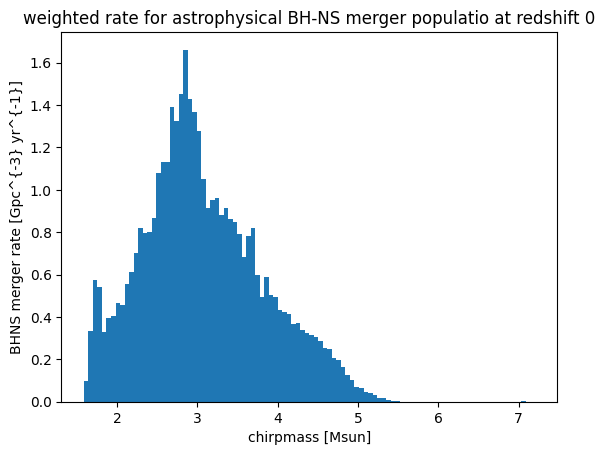

In [10]:
# to obtain the properties of the selected DCOtype you simply do this:

fDCO      = fdata['doubleCompactObjects']
#Stuff I need for cosmological integral


# at this moment we dont need to specify a mask, since our datafile has already taken this into account. 
DCOmask = [True]*(len(fDCO['Metallicity1'][...].squeeze()))
print(DCOmask)


metallicitySystems  = fDCO['Metallicity1'][...].squeeze()[DCOmask]  # Metallicity at ZAMS 
delayTimes          = fDCO['tform'][...].squeeze()[DCOmask] + \
                           fDCO['tc'][...].squeeze()[DCOmask]   # delay time 
tc                  = fDCO['tc'][...].squeeze()[DCOmask]  # coalescence time (or merger time)
M1              = fDCO['M1'][...].squeeze()[DCOmask]     # Compact object mass of star 1 
M2               = fDCO['M2'][...].squeeze()[DCOmask]    # Compact object mass of star 2 
m1zams              = fDCO['M1ZAMS'][...].squeeze()[DCOmask]   # Mass at ZAMS of star 1 
m2zams              = fDCO['M2ZAMS'][...].squeeze()[DCOmask]   # Mass at ZAMS of star 2 
separationzams      = fDCO['separationInitial'][...].squeeze()[DCOmask]   # separation at ZAMS of binary 


# we will use for this demo the weights from Star formation history model xyz = '112', these can be obtained using:
weights = fdata['weights_intrinsic']['w_112']

# change this to formation weights by uncommenting the following line:
# weights = fDCO['weight']


# other models can be chosen too. (there are more than 28 options currently)


def chirpmass(m1, m2):
    numer = (m1*m2)**(3./5)
    denom = (m1+m2)**(1./5)
    
    return numer/denom

# and you can plot properties, e.g., the chirpmass distribution: 
chirpmass =chirpmass(m1=M1, m2=M2)


plt.hist(chirpmass, bins=100, weights=weights)
plt.xlabel('chirpmass [Msun]')
plt.ylabel(r'BHNS merger rate [Gpc^{-3} yr^{-1}]')
plt.title('weighted rate for astrophysical BH-NS merger populatio at redshift 0')
plt.show()




### M1 more massive, M2 least massive:






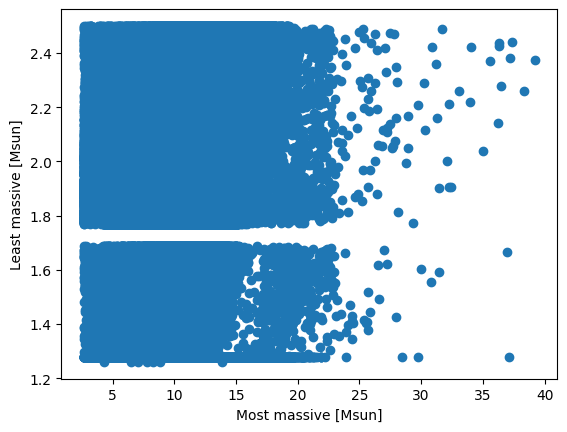

In [11]:
def obtainM1BHandM2BHassymetric(m1, m2):
    m1bh, m2bh = np.zeros_like(m1), np.zeros_like(m1)
    maskm1heavier = ( m1 >= m2)
    maskm2heavier = (m1 < m2)
    
    m1bh[maskm1heavier] = m1[maskm1heavier] 
    m1bh[maskm2heavier] = m2[maskm2heavier]
    m2bh[maskm1heavier] = m2[maskm1heavier]
    m2bh[maskm2heavier] = m1[maskm2heavier]
    
    return m1bh, m2bh # m1bh has all the heaviest systems



M_most_massive, M_least_massive = obtainM1BHandM2BHassymetric(m1=M1, m2=M2)


plt.scatter(M_most_massive, M_least_massive)
plt.xlabel('Most massive [Msun]')
plt.ylabel('Least massive [Msun]')
plt.show()



### Metallicity 

the metallicity of each data point can be obtained with "metallicitySystems"
I used a total of 53 different metallicity bins, quoted in the bottem when printing "Data.metallicityGrid" 

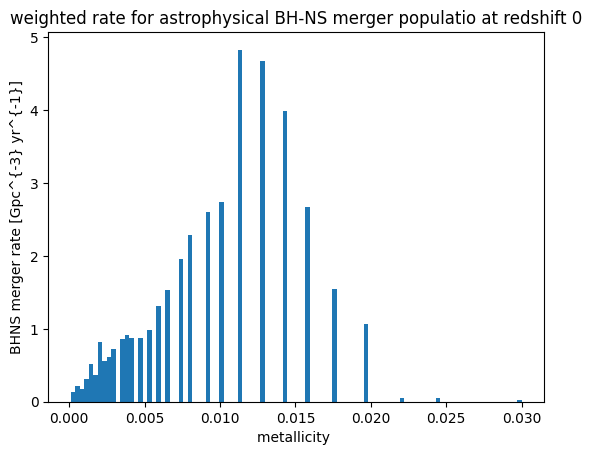

this mostly just shows my metallicity bins and where BHNS are originating from


In [12]:
# metallicitySystems = metallicitySystems
plt.hist(metallicitySystems, bins=100, weights=weights)
plt.xlabel('metallicity ')
plt.ylabel(r'BHNS merger rate [Gpc^{-3} yr^{-1}]')
plt.title('weighted rate for astrophysical BH-NS merger populatio at redshift 0')
plt.show()




print('this mostly just shows my metallicity bins and where BHNS are originating from')

### Delay time  of each simulated data point in Myr

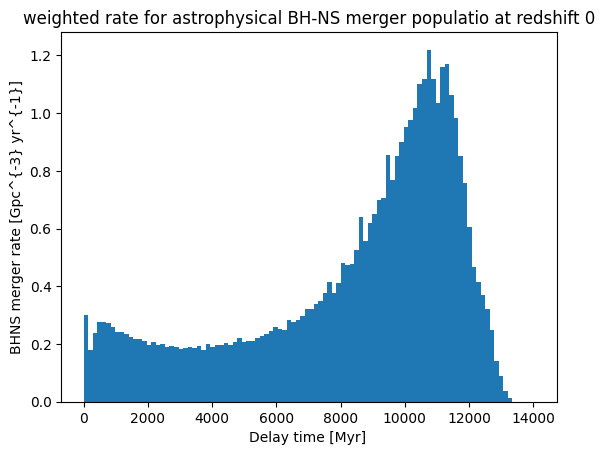

In [13]:


plt.hist(delayTimes, bins=100, weights=weights)
plt.xlabel('Delay time [Myr] ')
plt.ylabel(r'BHNS merger rate [Gpc^{-3} yr^{-1}]')
plt.title('weighted rate for astrophysical BH-NS merger populatio at redshift 0')
plt.show()




### etc. etc. 
We have lots of options for parameters/properties of BHNS that one can plot. 
we can add spins, other weights and/or models for star formation history. 
and we can do the same thing for completely different models. 

# Redshift Rates:

# calculate and store the redshift rates:

run `python FastCosmicIntegration.py  --mu0 0.035 --muz -0.23 --sigma0 0.39 --sigmaz 0.0 --alpha 0.0 --weight mixture_weight --zstep 0.01 --sens O3 --m1min 10. --aSF 0.01 --bSF 2.77 --cSF 2.9 --dSF 4.7`

In [14]:
import numpy as np
import h5py as h5
from astropy.table import Table, Column

import astropy.units as u
from astropy import constants as const

import matplotlib.pyplot as plt
from matplotlib import ticker, cm

from scipy import stats
import time 
import sys 

######################################
## set to the path where your BHNS data is stored ## 

DCOtype = 'BHNS'   # You can change this line to 'BBH', 'BHNS' 'BNS', or 'ALL' (All DCOs)  # change this line! (but required downloading BBH/BNS data from Zenodo)
fileLoc    =  '/Volumes/Andromeda2/DATA/AllDCO_bugfix/fiducial/'
filename   = 'COMPASOutput.h5'

full_data_path = fileLoc + filename
######################################
##PLOT setttings
plt.rc('font', family='serif')

from matplotlib import rc
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
fsize, SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE = 30,25,25,30
for obj in ['axes','xtick','ytick']:
    plt.rc(obj, labelsize=MEDIUM_SIZE)          # controls default text sizes
for obj in ['figure','axes']:
    plt.rc(obj, titlesize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize





### total mass evolved per COMPAS simulation = 5413447143 Msun [note for Floor]

In [21]:


filename   = 'COMPASCompactOutput_BHNS_A.h5'

full_data_path = fileLoc + filename


!python FastCosmicIntegration.py  \
--dco_type "BHNS" \
--mu0 0.035 --muz -0.23 --sigma0 0.39 --sigmaz 0.0 --alpha 0.0 \
--weight 'weight' \
--zstep 0.1\
--sens O3 --m1min 10. \
--aSF 0.01 --bSF 2.77 --cSF 2.9 --dSF 4.7 \
--path $full_data_path \
# --dontAppend 



m1 m2 [ 20.0012  20.8461  41.8615 ... 137.01   131.818  104.785 ] 
 [14.7999 16.9277 17.4826 ... 16.9924 15.5068 15.5475]
max(chirp_masses), (1+max_redshift_detection), Mc_max: 7.201173823529101 2 300.0
shape redshifts (101,)
shape COMPAS.sw_weights (1521875,)
COMPAS.DCOmask [False  True  True ...  True  True  True]  was set for dco_type BHNS
shape COMPAS COMPAS.DCOmask (1525553,)
pathToData /Volumes/Andromeda2/DATA/AllDCO_bugfix/fiducial/COMPASCompactOutput_BHNS_A.h5
Traceback (most recent call last):
  File "/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/demo_read_hdf5_file/FastCosmicIntegration.py", line 821, in <module>
    append_binned_by_z = False, redshift_binsize=0.05)
  File "/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/demo_read_hdf5_file/FastCosmicIntegration.py", line 533, in append_rates
    DCO             = h_new["doubleCompactObjects"]#
  File "/Users/floorbroekgaarden/miniforge3/lib/python3.10/site-packages/h5py/_hl/fi

5.9389913109386

In [20]:




################################################
## Open hdf5 file
File        = h5.File(fileLoc + filename ,'r')

print(File.keys())

# The group that contains the rate data
rate_key = 'Rates_mu00.035_muz-0.23_alpha0.0_sigma00.39_sigmaz0.0'
################################################
## Read merger rate related data
DCO_mask                  = File[rate_key]['DCOmask'][()] # Mask from DCO to merging BBH 
redshifts                 = File[rate_key]['redshifts'][()] # Redshifts at which the rates were calculated
O1_detection_rate         = File[rate_key]['detection_rateO3'][()] # detection rate for O1 sensitivity 

# Read the DCO masses, Select only merging BBHs
Mass1              = File['BSE_Double_Compact_Objects']['Mass(1)'][DCO_mask]
Mass2              = File['BSE_Double_Compact_Objects']['Mass(2)'][DCO_mask]
M_moreMassive      = np.maximum(Mass1, Mass2)
M_lessMassive      = np.minimum(Mass1, Mass2)


File.close()

<KeysViewHDF5 ['RLOF', 'commonEnvelopes', 'doubleCompactObjects', 'formationChannels', 'supernovae', 'systems', 'weights_detected', 'weights_detectedPerRedshift', 'weights_intrinsic', 'weights_intrinsicPerRedshift']>


KeyError: "Unable to open object (object 'Rates_mu00.035_muz-0.23_alpha0.0_sigma00.39_sigmaz0.0' doesn't exist)"

In [ ]:
# !python FastCosmicIntegration.py  \
# --mu0 0.035 --muz -0.23 --sigma0 0.39 --sigmaz 0.0 --alpha 0.0 \
# --weight 'weight' \
# --zstep 0.1\
# --sens O3 --m1min 10. \
# --aSF 0.01 --bSF 2.77 --cSF 2.9 --dSF 4.7 \
# --path $full_data_path \
# --dontAppend 

